# 🆕  PyBallMapper with Variable Radii

## Overview

This notebook demonstrates how to use the new **variable-radius** feature in **PyBallMapper**, allowing each landmark to have a custom radius when constructing the Ball Mapper graph. This is useful for datasets with **non-uniform density** or when domain knowledge suggests varying neighborhood scales across the data.

## Key Idea

In the standard Ball Mapper algorithm, all landmarks use a fixed radius `eps` to form their covering balls. In this modified version, we allow `eps` to be a **per-landmark parameter** — enabling finer control over the covering and ultimately a more flexible representation of the data's topology.


In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt

Let's generate a simple dataset

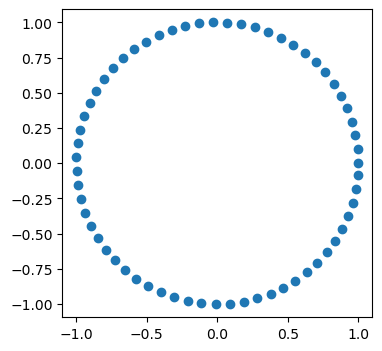

In [2]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=["x", "y"])

angle_df = pd.DataFrame(np.arange(0, 6.3, 0.1), columns=["angle"])

plt.figure(figsize=(4, 4))
plt.scatter(points_df.x, points_df.y)
plt.axis("equal")
plt.show()

This is the standard ball mapper.

In [3]:
from pyballmapper import BallMapper

In [4]:
## regular BM

bm = BallMapper(
    X=points_df.values,  # the pointcloud, as a numpy array
    eps=0.25,  # the radius of the balls
)

The eps is a single float.


<Axes: >

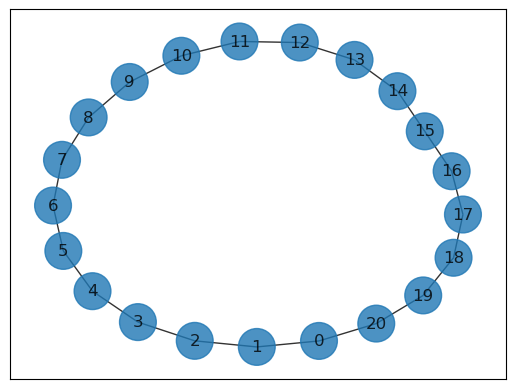

In [5]:
bm.draw_networkx()

The attribute `eps_dict` stores the radius of each ball.

In [6]:
print("The radii of the various balls are:")
for i, r in bm.eps_dict.items():
    print("ball {} has radius {:.3f}".format(i, r))

The radii of the various balls are:
ball 0 has radius 0.250
ball 1 has radius 0.250
ball 2 has radius 0.250
ball 3 has radius 0.250
ball 4 has radius 0.250
ball 5 has radius 0.250
ball 6 has radius 0.250
ball 7 has radius 0.250
ball 8 has radius 0.250
ball 9 has radius 0.250
ball 10 has radius 0.250
ball 11 has radius 0.250
ball 12 has radius 0.250
ball 13 has radius 0.250
ball 14 has radius 0.250
ball 15 has radius 0.250
ball 16 has radius 0.250
ball 17 has radius 0.250
ball 18 has radius 0.250
ball 19 has radius 0.250
ball 20 has radius 0.250


Let's now input a custom list of radii. It needs to have the same length of our input dataset.

In [7]:
## adaptive radii

radii = np.linspace(start=0.1, stop=0.5, num=len(points_df), endpoint=True)

multiple_radii_bm = bm = BallMapper(
    X=points_df.values,  # the pointcloud, as a numpy array
    eps=radii,  # the radius of the balls, this time is a numpy array
)

The eps is a list or NumPy array of lenght 63.


<Axes: >

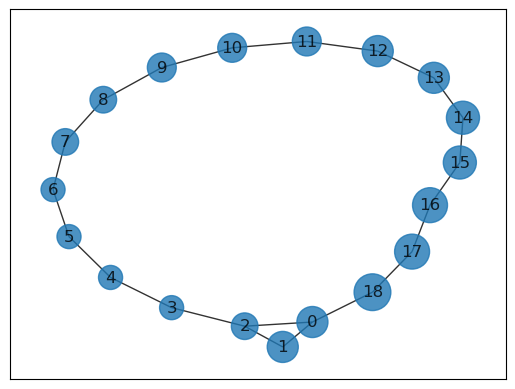

In [8]:
multiple_radii_bm.draw_networkx()

Note that by default, the radius of the balls in the plot is proportional to the number of points covered by the ball, not the radius of the covering ball!!


In [9]:
print("The radii of the various balls are:")
for i, r in multiple_radii_bm.eps_dict.items():
    print("ball {} has radius {:.3f}".format(i, r))

The radii of the various balls are:
ball 0 has radius 0.100
ball 1 has radius 0.113
ball 2 has radius 0.126
ball 3 has radius 0.139
ball 4 has radius 0.152
ball 5 has radius 0.165
ball 6 has radius 0.177
ball 7 has radius 0.190
ball 8 has radius 0.210
ball 9 has radius 0.229
ball 10 has radius 0.248
ball 11 has radius 0.268
ball 12 has radius 0.287
ball 13 has radius 0.313
ball 14 has radius 0.339
ball 15 has radius 0.365
ball 16 has radius 0.390
ball 17 has radius 0.423
ball 18 has radius 0.455
